# Monday, November 11th, 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Conway's Game of Life

Conway's [Game of Life](https://conwaylife.com/wiki/Conway%27s_Game_of_Life) is a cellular automaton created by John Conway in 1970. Similar to the Mayfly model, it is a deterministic process to update the state of a population of cells.

We will use 2D NumPy arrays to represent the population of cells aranged in an $n \times n$ grid.
A value of `1` will signify that a cell is alive while a value of `0` will signify that a cell is dead.

### Starting configuration

Lets begin with an $ n\times n $ array of all 0s with a small three-block column (3$\times$1) of 1s in the middle. Use an integer datatype (`dtype=int`) when defining your array.

**Exercise:**  Write a function `starting_state(n)` that returns the array described above.

In [2]:
def starting_state(n):
    cells = np.zeros((n,n), dtype=int)    # Initialize an nxn array of zeross
    cells[n//2 - 1: n//2 + 2, n//2] = 1
    
    return cells

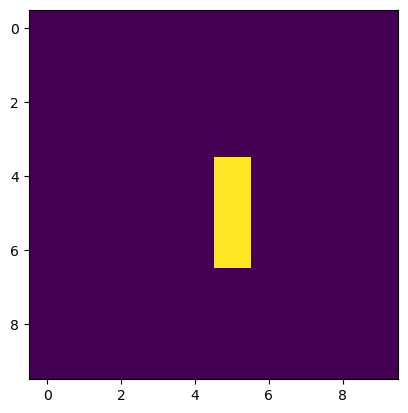

In [3]:
cells = starting_state(10)

plt.imshow(cells)

### Rules of Life

We will use the current state of the population to determine the next state.
In the Game of Life, each cell interacts with its eight neighbors (i.e. the horizontally, vertically, or diagonally adjacent cells).

![neighbors](https://jllottes.github.io/_images/epidemic-2.svg)

The rules of the Game of Life can be summarized as follows:

 1. Any live cell with two or three live neighbors survives.
 2. Any dead cell with with three live neighbors becomes a live cell.
 3. All other live cells die in the next generation, and all other dead cells stay dead.

### Counting the number of live neighbors

In order to update our array from one state to the next, we need to be able to count the number of live neighbors of the $(i,j)$th cell for any choice of $i,j$.

**Exercise:** Write a function `count_live_neighbors(cells,i,j)` that counts the number of living neighbors of the $(i,j)$th cell.

 - We handled a similar problem with the [Image Denoising](https://jllottes.github.io/Projects/image_denoising/image_denoising) project.
 - How can we handle cells on the edge of the grid?
 - The `np.sum` function will add all values in an array.
 - We want to exclude (or remove from the sum) the $(i,j)$th cell when counting the number of living neighbors.



In [9]:
def count_live_neighbors(cells,i,j):
    # Similar to the Image Denoising project, let's build a padded version of cells:
    nrows, ncols = cells.shape   # Get number of rows and columns of cells
    padded_cells = np.zeros((nrows + 2, ncols +2), dtype=int)
    padded_cells[1:-1, 1:-1] = cells      # Inset the cells array inside the padded cells
    
    grid = padded_cells[i:i+3, j:j+3] # Get a 3x3 grid centered on cell i,j from the padded array

    live_neighbors = np.sum(grid) - grid[1,1] # Add the live neighbors (including the cell itself)
                                              # and subtract the cell itself.
        
    return live_neighbors

In [21]:
count_live_neighbors(cells,5,6)

3

### Updating the `cells` population

We can now update the `cells` array according to the rules.  We have to update every entry of the array, so we will need to loop through all the entries.

**Exercise:** Write a function `update_cells(cells)` that takes in a population array `cells`, applies the Rules of Life to update the population, and returns the updated population.

In [23]:
def update_cells(cells):
    updated_cells = cells.copy()
    
    nrows, ncols = cells.shape
    for i in range(nrows):
        for j in range(ncols):
            live_neighbors = count_live_neighbors(cells,i,j)
            # Rule 1
            if cells[i,j] == 1:  # If the cell is alive:
                if (live_neighbors == 2) or (live_neighbors == 3):
                    updated_cells[i,j] = 1
                else:
                    updated_cells[i,j] = 0
            # Rule 2
            if cells[i,j] == 0: # If the cell is not alive:
                if (live_neighbors == 3):
                    updated_cells[i,j] = 1
                else:
                    updated_cells[i,j] = 0
            # Rule 3
            # If neither of the above rules applied, don't change anything

    return updated_cells

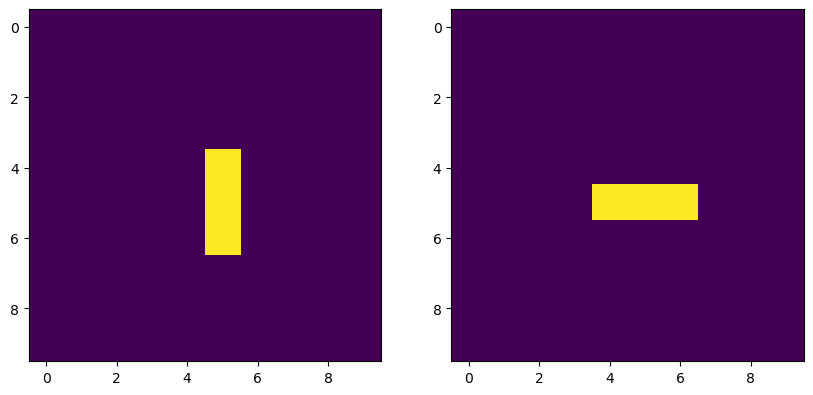

In [25]:
updated_cells = update_cells(cells)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(cells)

plt.subplot(1,2,2)
plt.imshow(updated_cells)

### Animating the dynamics

The `FuncAnimation` function from `matplotlib.animation` can be used to create animations.
It takes in a figure `fig` and function `animate`. The `animate` function should take in a frame index `i` and perform any desired updates to the figure.

In [27]:
%matplotlib qt
from matplotlib.animation import FuncAnimation

**Exercise:** Modify the code below to animate the Game of Life.

In [34]:
def starting_state(n):
    cells = np.zeros((n,n), dtype=int)    # Initialize an nxn array of zeross
    cells[n//2 - 2: n//2 + 2, n//2-1:n//2+1] = 1
    
    return cells

In [49]:
#cells = starting_state(10)   # Generates an initial configuration
cells = np.zeros((10,10),dtype=int)
live_mask = np.random.random(cells.shape) < 0.4
cells[live_mask] = 1

fig = plt.figure()
im = plt.imshow(cells,vmin=0,vmax=1)               # Generate the initial plot

def animate(i):
    updated_cells = update_cells(cells)        # Get updated cells
    cells[:,:] = updated_cells
    im.set_data(cells)                             # Update the figure with new x array
    return im

anim = FuncAnimation(fig, animate, cache_frame_data=False)
plt.show()

**Exercise:** Use `np.random.rand` to randomly select an initial `cells` array of `0`s and `1`s.